# Import libraries/packages

In [1]:
# Import pandas, numpy, seabon, sklearn, pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans

#SpectralClustering

#pd.set_option('max.rows', None)
#pd.set_option('max.columns', None)

%matplotlib inline

In [2]:
from config_and_dependencies.config import * 

## Import data

In [3]:
%store -r my_superficial

In [4]:
my_superficial.head()

,Analysis,Geology,Province,Region,Site,SubSite,Formation,Band,Nodule,Li7,...,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238,class
808,005_AB_1,Superficial,NaN,AB,AB,AB,NaN,AB,AB_1,19.35,...,0.01,0.00,0.01,0.0,0.01,0.00,0.56,0.05,0.210000,AB
809,006_AB_1,Superficial,NaN,AB,AB,AB,NaN,AB,AB_1,2.61,...,0.02,0.00,0.02,0.0,0.00,0.00,0.24,0.06,0.510000,AB
810,007_AB_1,Superficial,NaN,AB,AB,AB,NaN,AB,AB_1,2.29,...,0.02,0.00,0.00,0.0,0.02,0.01,0.48,0.05,0.242569,AB
811,008_AB_2,Superficial,NaN,AB,AB,AB,NaN,AB,AB_2,6.86,...,0.07,0.01,0.04,0.0,0.00,0.01,3.11,0.06,0.030000,AB
812,009_AB_2,Superficial,NaN,AB,AB,AB,NaN,AB,AB_2,8.45,...,0.05,0.00,0.04,0.0,0.01,0.00,3.04,0.06,0.060000,AB


In [67]:
my_superficial['Site'].unique()

array(['AB', 'LV', 'BR', 'KY', 'BF', 'ST', 'SH', 'CF', 'BG', 'AC', 'CR',
       'GH', 'PX', 'WF'], dtype=object)

In [115]:
X = my_superficial.loc[my_superficial['Region'] == 'SV']

In [116]:
X.head()

,Analysis,Geology,Province,Region,Site,SubSite,Formation,Band,Nodule,Li7,...,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238,class
958,043_ST_1_1,Superficial,NaN,SV,ST,ST,NaN,ST,ST_1,3.55,...,0.05,0.01,0.06,0.02,0.02,0.01,0.33,0.07,0.22,ST
959,044_ST_1_2,Superficial,NaN,SV,ST,ST,NaN,ST,ST_1,6.30,...,0.06,0.01,0.04,0.01,0.03,0.01,0.36,0.06,0.17,ST
960,045_ST_1_3,Superficial,NaN,SV,ST,ST,NaN,ST,ST_1,4.47,...,0.03,0.00,0.05,0.01,0.03,0.01,0.19,0.08,0.14,ST
961,046_ST_2_1,Superficial,NaN,SV,ST,ST,NaN,ST,ST_2,4.74,...,0.07,0.02,0.04,0.01,0.02,0.01,0.24,0.09,0.09,ST
962,047_ST_2_2,Superficial,NaN,SV,ST,ST,NaN,ST,ST_2,4.15,...,0.07,0.01,0.09,0.01,0.03,0.00,0.30,0.08,0.08,ST


In [117]:
X_CR = X.iloc[:,9:-1]

In [118]:
X_CR.head()

,Li7,Be9,B11,Mg24,Al27,Si28,P31,S33,K39,Ca42,...,Ho165,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238
958,3.55,0.25,46.29,41.71,380.41,465869.10,24.68,696.67,228.67,41.59,...,0.02,0.05,0.01,0.06,0.02,0.02,0.01,0.33,0.07,0.22
959,6.30,0.19,56.24,21.55,453.17,465774.79,31.54,703.04,267.63,62.91,...,0.01,0.06,0.01,0.04,0.01,0.03,0.01,0.36,0.06,0.17
960,4.47,0.15,50.51,23.70,471.68,465746.23,31.88,696.78,288.54,111.26,...,0.01,0.03,0.00,0.05,0.01,0.03,0.01,0.19,0.08,0.14
961,4.74,0.25,65.26,19.68,513.19,465600.74,78.07,679.72,273.34,226.43,...,0.03,0.07,0.02,0.04,0.01,0.02,0.01,0.24,0.09,0.09
962,4.15,0.37,67.21,18.44,447.47,465676.25,72.48,694.44,252.94,216.26,...,0.03,0.07,0.01,0.09,0.01,0.03,0.00,0.30,0.08,0.08


## Select only best feats (derived from RFE from PhD)

In [156]:
best_feats = ['Zr90', 'Ba137', 'Sr88', 'Ge72', 'Cr52', 'S33', 'U238', 'Al27', 'B11', 'Mg24', 'Nd146', 'Sc45', 'K39', 'Pr141', 'Li7']

In [157]:
X_CR = X_CR[X_CR.columns.intersection(best_feats)]

In [158]:
X_CR.head()

,Li7,B11,Mg24,Al27,S33,K39,Sc45,Cr52,Ge72,Sr88,Zr90,Ba137,Pr141,Nd146,U238
958,3.55,46.29,41.71,380.41,696.67,228.67,0.72,4.09,1.54,0.95,0.62,0.78,0.13,0.58,0.22
959,6.30,56.24,21.55,453.17,703.04,267.63,0.67,3.71,2.43,1.54,0.78,1.33,0.15,0.49,0.17
960,4.47,50.51,23.70,471.68,696.78,288.54,0.71,3.24,1.56,1.08,0.69,1.11,0.13,0.46,0.14
961,4.74,65.26,19.68,513.19,679.72,273.34,0.65,3.75,1.22,3.38,0.86,2.76,0.29,1.08,0.09
962,4.15,67.21,18.44,447.47,694.44,252.94,0.69,3.48,1.03,3.17,1.06,1.63,0.28,1.02,0.08


In [159]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X_CR)
plt.scatter(X_CR.iloc[:, 9], X_CR.iloc[:, 23], c=labels, s=50, cmap='viridis');



IndexError: single positional indexer is out-of-bounds

In [160]:
import plotly.express as px

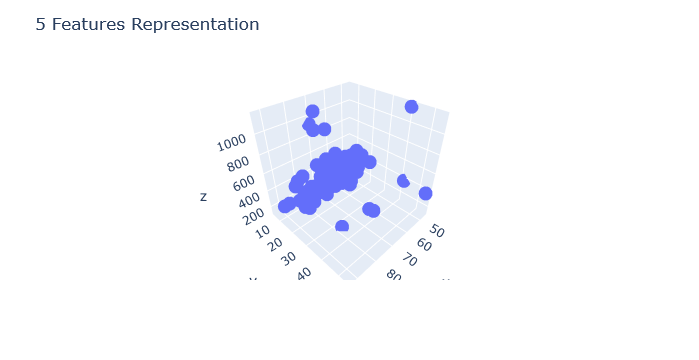

In [161]:
fig2 = px.scatter_3d(X_CR, x=X_CR.iloc[:,1], y=X_CR.iloc[:,2],z=X_CR.iloc[:,3])#size="amount_spent")
fig2.update_layout(title="5 Features Representation")
fig2.show()

In [79]:
from sklearn.cluster import KMeans, SpectralClustering

In [80]:
km = KMeans(n_clusters=14, max_iter=300)
km.fit(X)
centroids = km.cluster_centers_
y_kmeans = km.predict(X)
km.labels_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(10, 10))

plt.scatter(X.iloc[:,1], X.iloc[:,51], c=y_kmeans, cmap='viridis', label='Nodule')
#plt.scatter(X_std[:,2], X_std[:,3], c='blue', label='cluster 2')
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r', label='centroid')

plt.legend()
plt.xlim([-0.5, 1])
plt.ylim([-0.5, 1])
plt.xlabel('Elem 1')
plt.ylabel('Elem 2')
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal');

ValueError: could not convert string to float: '005_BG_1'

## TSNE

In [162]:
my_scaler_test = StandardScaler()

In [163]:
element_data_test_scaled = my_scaler_test.fit_transform(X_CR)

In [164]:
my_tsne_test = TSNE(n_components=3, perplexity=25, learning_rate=200, n_iter=2000, verbose=3).fit_transform(element_data_test_scaled)

C:\Users\User\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 120 samples in 0.000s...
[t-SNE] Computed neighbors for 120 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 120 / 120
[t-SNE] Mean sigma: 1.846357
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 83.7211533, gradient norm = 0.1917777 (50 iterations in 0.045s)
[t-SNE] Iteration 100: error = 101.6204071, gradient norm = 0.2144256 (50 iterations in 0.038s)
[t-SNE] Iteration 150: error = 105.3584290, gradient norm = 0.1393393 (50 iterations in 0.039s)
[t-SNE] Iteration 200: error = 115.3224869, gradient norm = 0.1675244 (50 iterations in 0.029s)
[t-SNE] Iteration 250: error = 119.8119965, gradient norm = 0.1543502 (50 iterations in 0.033s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 119.811996
[t-SNE] Iteration 300: error = 2.9677670, gradient norm = 0.0003688 (50 iterations in 0.038s)
[t-SNE] Iteration 350: error = 2.5645051, gradient norm = 0.0001

In [165]:
tsne_df_test = pd.DataFrame(data = my_tsne_test, columns = ['tsne1', 'tsne2', 'tsne3'])

### add group back in (nodule)

In [166]:
Nodulecol = X['Nodule']

In [167]:
Nodulecol.head()

958    ST_1
959    ST_1
960    ST_1
961    ST_2
962    ST_2
Name: Nodule, dtype: object

In [168]:
tsne3d_df_NoduleCol_comb = pd.concat([Nodulecol.reset_index(drop=True), tsne_df_test.reset_index(drop=True)], axis=1)

In [169]:
%store tsne3d_df_NoduleCol_comb

Stored 'tsne3d_df_NoduleCol_comb' (DataFrame)


In [170]:
tsne3d_df_NoduleCol_comb.head()

,Nodule,tsne1,tsne2,tsne3
0,ST_1,-63.722008,-120.214165,-222.186905
1,ST_1,-129.936020,114.181175,-221.819412
2,ST_1,-79.461258,-26.806089,-203.428604
3,ST_2,-95.591789,-26.882862,-84.787292
4,ST_2,-93.689835,-163.507965,26.328199


## TSNE Visualisation

In [171]:
tsne3dIssuelabels = Nodulecol

In [172]:
filepath = 'figures/Butcher2005_Tom_tSNE_3dPlot_Issue_bestfeats.html'

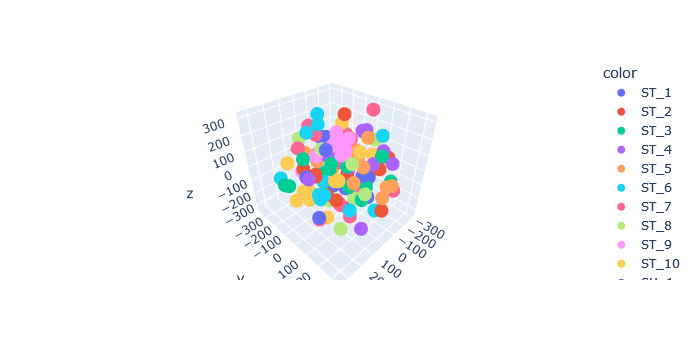

In [173]:
fig2 = px.scatter_3d(tsne3d_df_NoduleCol_comb, 
                     x=tsne3d_df_NoduleCol_comb.iloc[:,1], 
                     y=tsne3d_df_NoduleCol_comb.iloc[:,2], 
                     z=tsne3d_df_NoduleCol_comb.iloc[:,3], 
                     color=tsne3dIssuelabels)
fig2.show()

#if save_plots == True:
#    fig.write_html(filepath)

# PCA

In [174]:
df = X_CR

In [175]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [176]:
scaled_data = scaler.transform(df)

In [177]:
pca = PCA(n_components=3)

In [178]:
pca.fit(scaled_data)

PCA(n_components=3)

In [179]:
x_pca = pca.transform(scaled_data)

In [180]:
scaled_data.shape

(120, 15)

In [181]:
x_pca.shape

(120, 3)

In [182]:
LabelCol = pd.DataFrame(data=X['Nodule'])

In [183]:
LabelCol.head()

,Nodule
958,ST_1
959,ST_1
960,ST_1
961,ST_2
962,ST_2


In [184]:
PCA_DF = pd.DataFrame(data=x_pca)

In [185]:
#print(PCA_DF)

In [186]:
#IssueCol = coins['issue or phase']

In [187]:
pca3d_df_NoduleCol_comb = pd.concat([LabelCol.reset_index(drop=True), PCA_DF], axis=1)

In [188]:
pca3d_df_NoduleCol_comb.head()

,Nodule,0,1,2
0,ST_1,-1.179002,-1.533150,1.792448
1,ST_1,-1.325651,-1.186289,2.420702
2,ST_1,-1.123900,-1.666559,1.696057
3,ST_2,-0.192207,-0.933214,0.236607
4,ST_2,-0.546745,-0.946185,0.018955


In [189]:
#print(pca3d_df_NoduleCol_comb)

In [190]:
pca3d_df_NoduleCol_comb.columns = ['Nodule', 'PC1', 'PC2', 'PC3']

## 3D PCA Visualisation

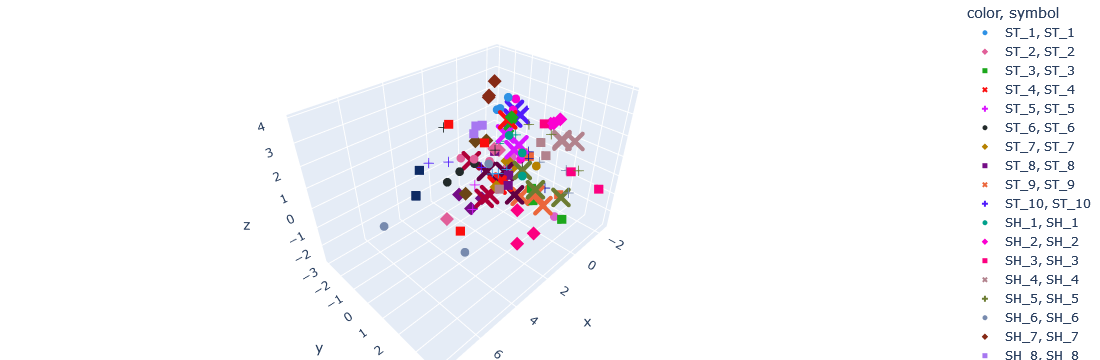

In [192]:
fig = px.scatter_3d(pca3d_df_NoduleCol_comb, 
                    x=pca3d_df_NoduleCol_comb.iloc[:,1], 
                    y=pca3d_df_NoduleCol_comb.iloc[:,2], 
                    z=pca3d_df_NoduleCol_comb.iloc[:,3], 
                    color=pca3d_df_NoduleCol_comb.iloc[:,0],
                    color_discrete_sequence=px.colors.qualitative.Dark24,
                    symbol = pca3d_df_NoduleCol_comb.iloc[:,0])
fig.update_traces(marker_size = 5)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#if save_plots == True:
#    fig.write_html(filepath) 